<a href="https://www.kaggle.com/code/allasamoilenko/data-analysis-crime-samoilenko?scriptVersionId=235009819" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree

In [39]:
data ='/kaggle/input/crime-cast-forecasting-crime-categories/train.csv'

df = pd.read_csv(data)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [40]:
df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [42]:
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [43]:
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
datetime_columns 

['Date_Reported', 'Date_Occurred']

In [44]:
numb_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numb_columns 

['Latitude',
 'Longitude',
 'Time_Occurred',
 'Area_ID',
 'Reporting_District_no',
 'Part 1-2',
 'Victim_Age',
 'Premise_Code',
 'Weapon_Used_Code']

In [45]:
categor_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categor_columns 

['Location',
 'Cross_Street',
 'Area_Name',
 'Modus_Operandi',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Description',
 'Weapon_Description',
 'Status',
 'Status_Description',
 'Crime_Category']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               20000 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               20000 non-null  float64       
 3   Longitude              20000 non-null  float64       
 4   Date_Reported          20000 non-null  datetime64[ns]
 5   Date_Occurred          20000 non-null  datetime64[ns]
 6   Time_Occurred          20000 non-null  float64       
 7   Area_ID                20000 non-null  float64       
 8   Area_Name              20000 non-null  object        
 9   Reporting_District_no  20000 non-null  float64       
 10  Part 1-2               20000 non-null  float64       
 11  Modus_Operandi         17259 non-null  object        
 12  Victim_Age             20000 non-null  float64       
 13  V

In [47]:
area_mapping = df.groupby('Area_ID')['Area_Name'].unique().reset_index()
area_mapping['Unique_Count'] = area_mapping['Area_Name'].apply(len)

# Вивести ID, де є неоднозначність (кількість унікальних назв > 1)
result = area_mapping[area_mapping['Unique_Count'] > 1]
result

,Area_ID,Area_Name,Unique_Count


In [48]:
print("Рядки з Area_ID, але без Area_Name:", df[df['Area_ID'].notna() & df['Area_Name'].isna()].shape[0])
print("Рядки з Area_Name, але без Area_ID:", df[df['Area_Name'].notna() & df['Area_ID'].isna()].shape[0])

Рядки з Area_ID, але без Area_Name: 0
Рядки з Area_Name, але без Area_ID: 0


In [49]:
print("Унікальних Area_ID:", df['Area_ID'].nunique())
print("Унікальних Area_Name:", df['Area_Name'].nunique())

Унікальних Area_ID: 21
Унікальних Area_Name: 21


In [50]:
pd.pivot_table(df, index='Area_ID', columns='Area_Name', aggfunc='size', fill_value=0)

Area_Name,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
Area_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0,1156,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,931,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1130,0,0,0,0,0
4.0,0,0,0,0,0,755,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,872,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,1014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,943
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,910,0,0
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,902,0,0,0


In [59]:
df = df.drop(columns=['Area_ID'])

KeyError: "['Area_ID'] not found in axis"

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               20000 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               20000 non-null  float64       
 3   Longitude              20000 non-null  float64       
 4   Date_Reported          20000 non-null  datetime64[ns]
 5   Date_Occurred          20000 non-null  datetime64[ns]
 6   Time_Occurred          20000 non-null  float64       
 7   Area_Name              20000 non-null  object        
 8   Reporting_District_no  20000 non-null  float64       
 9   Part 1-2               20000 non-null  category      
 10  Modus_Operandi         17259 non-null  object        
 11  Victim_Age             20000 non-null  float64       
 12  Victim_Sex             17376 non-null  object        
 13  V

In [61]:
part = df[['Part 1-2']]
part.head(20)

SyntaxError: invalid syntax (<ipython-input-61-8fc3c7cb5d33>, line 1)

In [62]:
part = df[['Crime_Category']]
part.head(20)

NameError: name 'Crime_Category' is not defined

In [63]:
pd.pivot_table(df, index='Crime_Category', columns='Part 1-2', aggfunc='size', fill_value=0)

<ipython-input-63-e68683b1e1ae>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, index='Crime_Category', columns='Part 1-2', aggfunc='size', fill_value=0)


Part 1-2,1.0,2.0
Crime_Category,,
Crimes against Persons,33,192
Crimes against Public Order,331,1477
Fraud and White-Collar Crimes,0,1355
Other Crimes,0,179
Property Crimes,9658,2008
Violent Crimes,1615,3152


In [64]:
df['Part 1-2'] = df['Part 1-2'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               20000 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               20000 non-null  float64       
 3   Longitude              20000 non-null  float64       
 4   Date_Reported          20000 non-null  datetime64[ns]
 5   Date_Occurred          20000 non-null  datetime64[ns]
 6   Time_Occurred          20000 non-null  float64       
 7   Area_Name              20000 non-null  object        
 8   Reporting_District_no  20000 non-null  float64       
 9   Part 1-2               20000 non-null  category      
 10  Modus_Operandi         17259 non-null  object        
 11  Victim_Age             20000 non-null  float64       
 12  Victim_Sex             17376 non-null  object        
 13  V

KeyError: 'Area_ID'

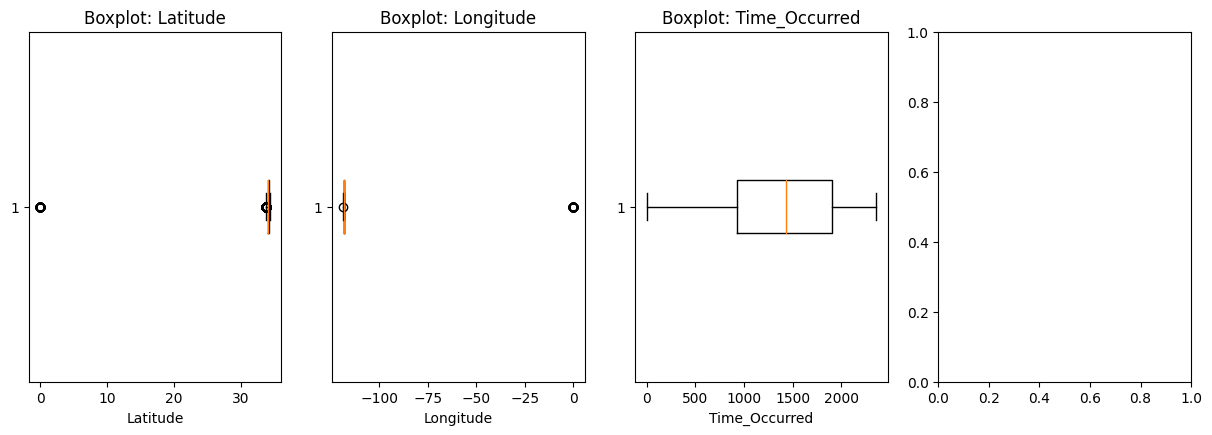

In [65]:
plt.figure(figsize=(15, 10))  # Розмір області малювання

# Побудова boxplot для кожної числової колонки
for i, column in enumerate(numb_columns, 1):
    plt.subplot(2, 4, i)  # 2 рядки, 4 стовпці
    plt.boxplot(df[column].dropna(), vert=False)  # vert=False для горизонтального вигляду
    plt.title(f'Boxplot: {column}')
    plt.xlabel(column)

plt.tight_layout()  # Автоматичне розташування графіків
plt.show()

In [66]:
numb_columns 

['Latitude',
 'Longitude',
 'Time_Occurred',
 'Area_ID',
 'Reporting_District_no',
 'Part 1-2',
 'Victim_Age',
 'Premise_Code',
 'Weapon_Used_Code']